In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
data = pd.read_csv('./data/vaccine_dataset.csv', encoding='cp949')

In [3]:
print(data.shape)
data

(25, 12)


,자치구,2-6월 1차접종자,2-6월 2차접종자,7월말(누적) 1차접종자,7월말(누적) 2차접종자,8월말(누적) 1차접종자,8월말(누적) 2차접종자,9월말(누적) 1차접종자,9월말(누적) 2차접종자,10월말(누적) 1차접종자,10월말(누적) 2차접종자,10월말(누적) 추가접종
0,종로구,64067,28168,79113,40119,114242,67930,113892,74683,118945,112459,198
1,중구,55134,18966,71425,27964,83716,48807,99187,63028,104060,97949,724
2,용산구,65070,23205,82264,32113,122796,67814,173186,114336,180716,170709,184
3,성동구,85252,29483,107896,38956,162919,87625,224883,144948,233290,221269,1710
4,광진구,96935,32176,126826,42969,193076,102210,273100,169311,285027,268408,276
5,동대문,108974,37645,135938,52197,197038,112812,266745,170090,278468,262492,301
6,중랑구,121020,37202,151126,50930,224666,123305,305981,198802,318538,300751,1632
7,성북구,123098,40628,157280,57198,234755,128638,331297,214061,345468,325879,956
8,강북구,98512,30238,121981,42730,178134,100289,234629,155912,244260,230401,306
9,도봉구,101938,31983,129750,44237,188046,104525,247847,169288,257277,244060,367


### 노원구의 백신 접종자 시각화 그래프!

In [4]:
target = np.array(data[10:11])
y = target[0][1:]
temp = y
y

array([154746, 50128, 202026, 70246, 297987, 163457, 391387, 267977,
       405901, 385016, 1502], dtype=object)

In [5]:
primary = temp[::2]
primary = primary[:5]
primary

array([154746, 202026, 297987, 391387, 405901], dtype=object)

In [6]:
secondary = temp[1::2]
secondary

array([50128, 70246, 163457, 267977, 385016], dtype=object)

In [7]:
label=['2-6월 1차','7월 1차','8월 1차','9월 1차','10월 1차']
index = np.arange(len(label))

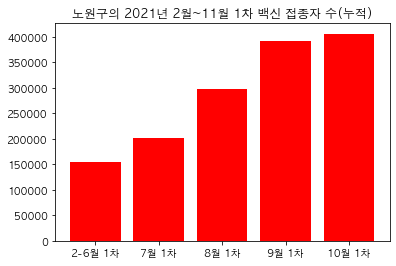

<Figure size 1296x720 with 0 Axes>

In [8]:
plt.bar(label, primary, color='red')
plt.title('노원구의 2021년 2월~10월 1차 백신 접종자 수(누적)')
plt.figure(figsize=(18,10))
plt.show()

In [9]:
label=['2-6월 2차','7월 2차','8월 2차','9월 2차','10월 2차']
index = np.arange(len(label))

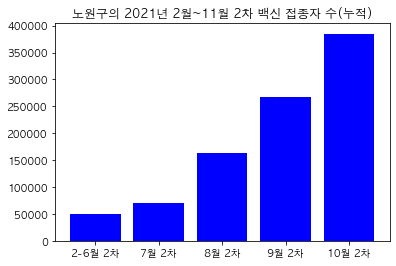

<Figure size 1296x720 with 0 Axes>

In [10]:
plt.bar(label, secondary, color='blue')
plt.title('노원구의 2021년 2월~10월 2차 백신 접종자 수(누적)')
plt.figure(figsize=(18,10))
plt.show()

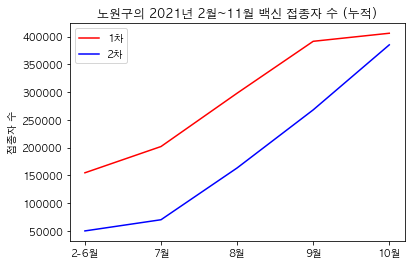

In [11]:
label = ['2-6월', '7월', '8월', '9월', '10월']
plt.title('노원구의 2021년 2월~10월 백신 접종자 수 (누적)')
plt.plot(label, primary, color='red', label='1차')
plt.plot(label, secondary, color='blue', label='2차')
plt.ylabel('접종자 수')
plt.legend()
plt.show()

### 10월 이후 2차 누적 접종자수 예측하기 (ARIMA 이용)

In [17]:
data = pd.pivot_table(data=data, index='자치구', values='10월말(누적) 2차접종자', aggfunc=sum)
data

,10월말(누적) 2차접종자
자치구,
강남구,373874
강동구,343570
강북구,230401
강서구,431076
관악구,385016
광진구,268408
구로구,329521
금천구,194939
노원구,385016


In [26]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data_cumsum = data.cumsum()
data_cumsum.head()

,10월말(누적) 2차접종자
자치구,
강남구,373874
강동구,717444
강북구,947845
강서구,1378921
관악구,1763937


In [21]:
model = ARIMA(data_cumsum['10월말(누적) 2차접종자'].values, order=(1,2,1))
fit_model = model.fit(trend='c', full_output=True, disp=True)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.e

Text(0.5, 1.0, 'Error variation of actual and predicted values')

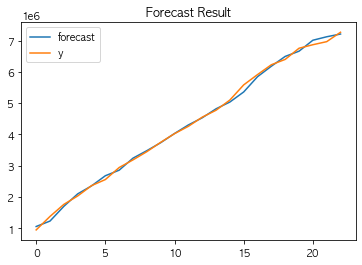

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


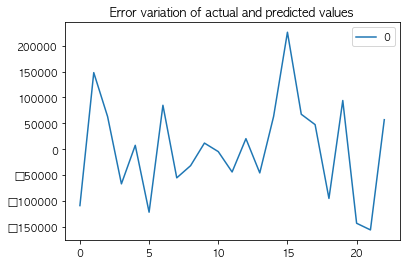

In [27]:
fit_model.plot_predict()
plt.title('Forecast Result')
pd.DataFrame(fit_model.resid).plot()
plt.title('Error variation of actual and predicted values')

In [29]:
forcast = fit_model.forecast(steps=5)
pred_y = forcast[0].tolist()
pred_y

[7496108.067180922,
 7726439.507800969,
 7952648.057261707,
 8174826.920177383,
 8392972.624852749]

In [30]:
pd.DataFrame(data=pred_y, index=['11월','12월','1월','2월','3월'],
             columns=['2차 누적 접종자 수(cumsum)'])

,2차 누적 접종자 수(cumsum)
11월,7.496108e+06
12월,7.726440e+06
1월,7.952648e+06
2월,8.174827e+06
3월,8.392973e+06
